In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city,ride, on = 'city',how = 'outer' )

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5628545007794
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,910050116494
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,820639054416
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9554935945413
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,720020655850


In [39]:
#City Series
bubble_df = pyber_df.groupby('city')
#Average Fare Per City
avg_fare = bubble_df['fare'].mean()
# # Total Rides Per City
total_rides = bubble_df['ride_id'].count()
# # #Total Drivers Per City
total_drivers = bubble_df['driver_count'].mean()
# #City Type Data
city_type = city.set_index('city')['type']
# #Create New DataFrame For Bubble Plot
bubble_data = pd.DataFrame({'Number Of Rides':total_rides,'Average Fare': avg_fare,
                          'Total Drivers': total_drivers, 'City Type': city_type})

bubble_data

,Number Of Rides,Average Fare,Total Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural
Brandonfort,19,35.437368,10,Suburban
Carriemouth,27,28.314444,52,Urban
Christopherfurt,27,24.501852,41,Urban
Colemanland,22,30.894545,23,Suburban
Davidfurt,17,31.995882,23,Suburban


## Bubble Plot of Ride Sharing Data

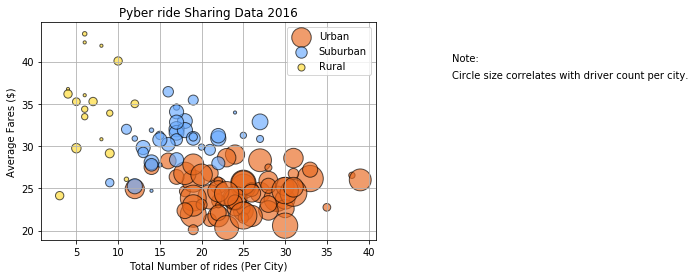

In [71]:
# use loc funtion to create 3 data sets for each city type
urban = bubble_data.loc[bubble_data["City Type"]== "Urban"]
Suburban = bubble_data.loc[bubble_data["City Type"]== "Suburban"]
rural = bubble_data.loc[bubble_data ["City Type"]== "Rural"]

#create 3 plots
plt.scatter(urban['Number Of Rides'], y = urban['Average Fare'], s=urban['Total Drivers']*10,label = 'Urban', color = "#E8681E", edgecolors="black", alpha=0.65)
plt.scatter(suburban['Number Of Rides'], y = suburban['Average Fare'], s=suburban['Total Drivers']*10,label = 'Suburban', color = "#69AAFE", edgecolors="black", alpha=0.65)
plt.scatter(rural['Number Of Rides'], y = rural['Average Fare'], s=rural['Total Drivers']*10,label = 'Rural', color = "#ffdb2E", edgecolors="black", alpha=0.65)

#labels
plt.title("Pyber ride Sharing Data 2016")
plt.xlabel("Total Number of rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.text(50,40,"Note:") 
plt.text(50,38,"Circle size correlates with driver count per city.")

#Add the legend.
plt.legend(loc= "upper right")
#add grid
plt.grid()
#save figure
plt.savefig("PyberRideSharinfgData2016.png")
plt.show()


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

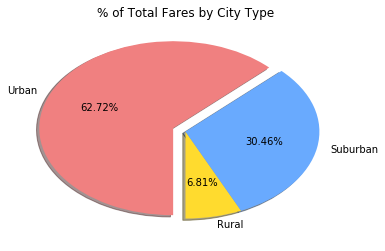

In [88]:
# Calculate sum of fares by city type
city_fare_pie = pyber_df.groupby(["type"])["fare"].sum()


#create labels
labels = city_fare_pie.index
labels
colors = ["#ffdb2E","#69AAFE","lightcoral"]
explode = (0,0,0.1)
#plot pie
plt.pie(city_fare_pie, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.title("% of Total Fares by City Type")
plt.savefig("TotalFareByCityType.png")
plt.show()
# Save Figure


In [86]:
# Show Figure
plt.show()

## Total Rides by City Type

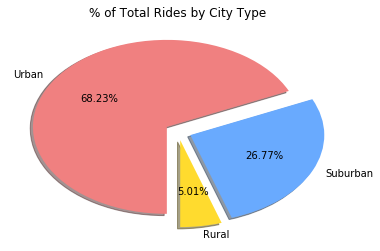

In [90]:
# Calculate number of rides by city type
city_rides_pie = pyber_df.groupby(["type"])['ride_id'].sum()

# Build Pie Chart
#create labels
labels = city_rides_pie.index
colors = ["#ffdb2E","#69AAFE","lightcoral"]
explode = (0.1,0.1,0.1)
#plot pie
plt.pie(city_rides_pie, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.title("% of Total Rides by City Type")
plt.savefig("TotalRidesByCityType.png")
plt.show()

# Save Figure


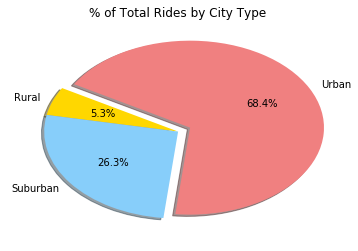

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

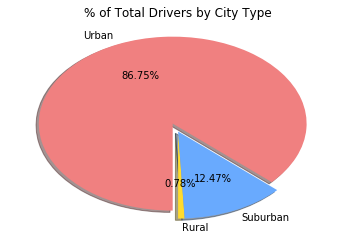

In [92]:
city_drivers_pie = pyber_df.groupby(["type"])['driver_count'].sum()

#create labels
labels = city_drivers_pie.index
colors = ["#ffdb2E","#69AAFE","lightcoral"]
explode = (0,0,0.1)
#plot pie
plt.pie(city_drivers_pie, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.title("% of Total Drivers by City Type")
plt.savefig("TotalDriversByCityType.png")
plt.show()


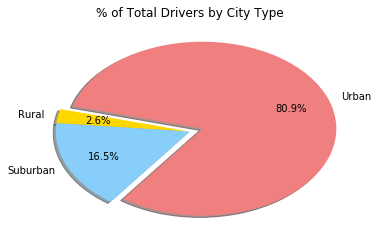

In [6]:
# Show Figure
plt.show()